In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

### EXPLORING DATA 

###### LOADING DATA 

In [3]:
data = pd.read_csv('mcdonalds.csv')

###### VARIABLE NAMES

In [3]:
column_names = data.columns.tolist()
print(column_names)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


###### SAMPLE SIZE

In [4]:
num_rows, num_cols = data.shape
print(num_rows, num_cols)

1453 15


###### PRINTING FIRST THREE ROWS

In [5]:
first_three_rows = data.head(3)
print(first_three_rows)

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


###### CONVERTING VERBAL YES/NO TO NUMERIC BINARY

In [4]:
MD_x = data.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)
col_means = pd.DataFrame(MD_x).mean().round(2)
print(col_means)

0     0.55
1     0.91
2     0.09
3     0.87
4     0.53
5     0.90
6     0.60
7     0.64
8     0.36
9     0.20
10    0.24
dtype: float64


###### COMPUTING PRINCIPAL COMPONENT ANALYSIS AND CREATING A PERCEPTUAL MAP

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

In [6]:
print("Importance of components:")
print(pca.explained_variance_ratio_)


Importance of components:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [7]:
print("\nSummary of PCA:")
print(pd.DataFrame({"Standard deviation": pca.explained_variance_,
                    "Proportion of Variance": pca.explained_variance_ratio_,
                    "Cumulative Proportion": pca.explained_variance_ratio_.cumsum()},
                   index=range(1, len(pca.explained_variance_) + 1)))


Summary of PCA:
    Standard deviation  Proportion of Variance  Cumulative Proportion
1             0.573124                0.299447               0.299447
2             0.369002                0.192797               0.492244
3             0.254641                0.133045               0.625290
4             0.159040                0.083096               0.708386
5             0.113842                0.059481               0.767866
6             0.096270                0.050300               0.818166
7             0.083925                0.043849               0.862015
8             0.075692                0.039548               0.901563
9             0.070358                0.036761               0.938323
10            0.061922                0.032353               0.970677
11            0.056123                0.029323               1.000000


In [8]:
np.set_printoptions(precision=1) # factor - loadings
print(MD_pca)

[[ 0.4 -0.2  0.7 ...  0.2  0.5 -0.6]
 [-0.2  0.4 -0.7 ...  0.1  0.5 -0.5]
 [ 0.4  0.7 -0.1 ... -0.3  0.1  0.2]
 ...
 [-0.2  1.1  0.2 ...  0.   0.1 -0. ]
 [-1.2 -0.   0.6 ...  0.  -0.  -0.1]
 [ 1.6  0.3 -0.  ... -0.1 -0.4 -0.5]]


In [11]:
print("Standard deviations (1, .., p=11):")
print([f"{value:.1f}" for value in pca.explained_variance_])


Standard deviations (1, .., p=11):
['0.6', '0.4', '0.3', '0.2', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


In [12]:
print("Rotation (n x k) = (11 x 11):")
for i, component in enumerate(pca.components_, 1):
    print(f"PC{i} {' '.join([f'{value:.2f}' for value in component])}")

Rotation (n x k) = (11 x 11):
PC1 -0.48 -0.16 -0.01 0.12 0.30 -0.11 -0.34 -0.47 0.33 -0.21 0.37
PC2 0.36 0.02 0.02 -0.03 -0.06 -0.09 -0.61 0.31 0.60 0.08 -0.14
PC3 -0.30 -0.06 -0.04 -0.32 -0.80 -0.06 -0.15 -0.29 0.02 0.19 -0.09
PC4 0.06 -0.14 0.20 -0.35 0.25 -0.10 0.12 -0.00 0.07 0.76 0.37
PC5 -0.31 0.28 0.07 -0.07 0.36 0.11 -0.13 -0.21 -0.00 0.29 -0.73
PC6 0.17 -0.35 -0.36 -0.41 0.21 -0.59 -0.10 -0.08 -0.26 -0.18 -0.21
PC7 -0.28 -0.06 0.71 -0.39 0.04 -0.09 -0.04 0.36 -0.07 -0.35 -0.03
PC8 0.01 -0.11 0.38 0.59 -0.14 -0.63 0.14 -0.07 0.03 0.18 -0.17
PC9 0.57 -0.02 0.40 -0.16 -0.00 0.17 0.08 -0.64 0.07 -0.19 -0.07
PC10 -0.11 -0.67 -0.08 -0.01 0.01 0.24 0.43 0.08 0.45 -0.04 -0.29
PC11 0.05 -0.54 0.14 0.25 0.00 0.34 -0.49 0.02 -0.49 0.16 -0.04


###### SCATTER PLOT FOR PCA PROJECTIONS

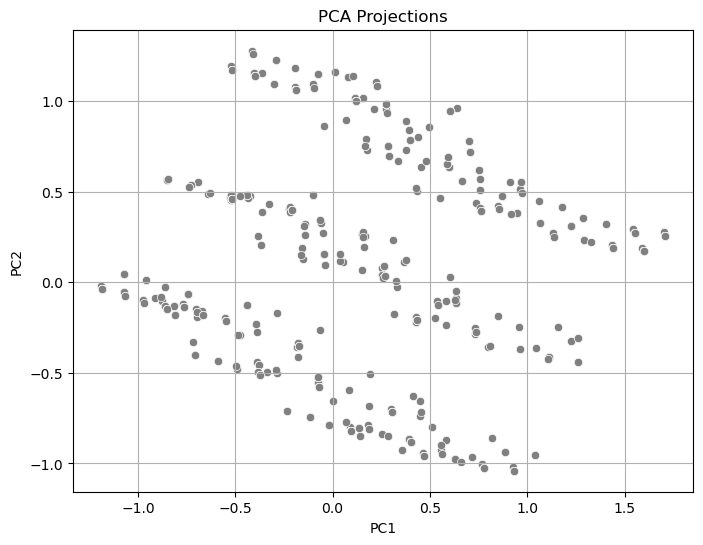

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projections')
plt.grid(True)
plt.show()

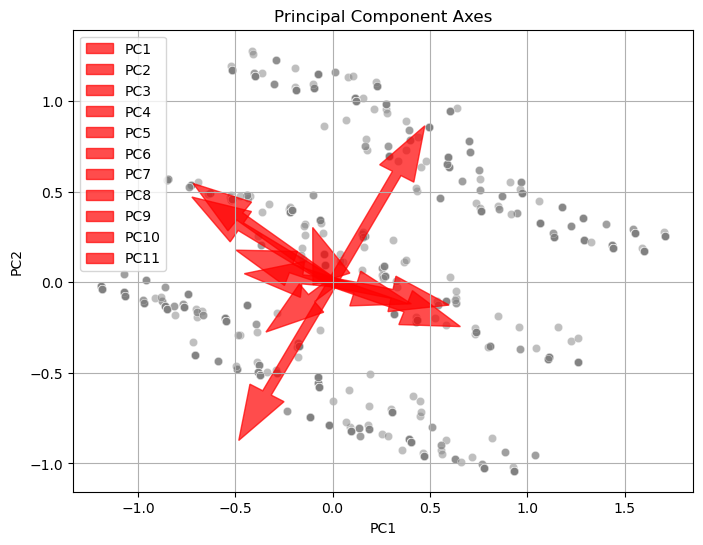

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], color='grey', alpha=0.5)
for i, (pcx, pcy) in enumerate(zip(pca.components_[0], pca.components_[1]), 1):
    plt.arrow(0, 0, pcx, pcy, color='red', width=0.05, head_width=0.2, alpha=0.7, label=f'PC{i}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.grid(True)
plt.legend()
plt.show()

### EXTRACTING SEGMENTS

##### USING K-MEANS

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [6]:
np.random.seed(1234)

In [7]:
k_range = range(2, 9)

In [8]:
n_rep = 10

In [9]:
clustering_results = []

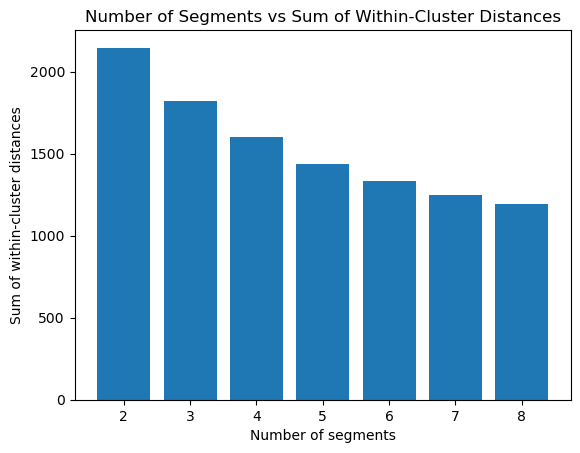

In [21]:
import matplotlib.pyplot as plt
within_cluster_distances = [kmeans.inertia_ for kmeans in clustering_results]
plt.bar(k_range, within_cluster_distances)
plt.xlabel('Number of segments')
plt.ylabel('Sum of within-cluster distances')
plt.title('Number of Segments vs Sum of Within-Cluster Distances')
plt.show()


In [12]:
n_boot = 100

In [13]:
bootstrap_results = []

In [14]:
for _ in range(n_boot):
    bootstrap_sample_indices = np.random.choice(len(MD_x), size=len(MD_x), replace=True)
    bootstrap_sample = MD_x[bootstrap_sample_indices]

In [15]:
clustering_results = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(bootstrap_sample)
    clustering_results.append(kmeans)

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

In [16]:
bootstrap_results.append(clustering_results)

In [17]:
import matplotlib.pyplot as plt

adjusted_rand_indices = []
for bootstrap_sample in bootstrap_results:
    rand_indices = []
    for kmeans in bootstrap_sample:
        rand_indices.append(kmeans.inertia_)
    adjusted_rand_indices.append(rand_indices)

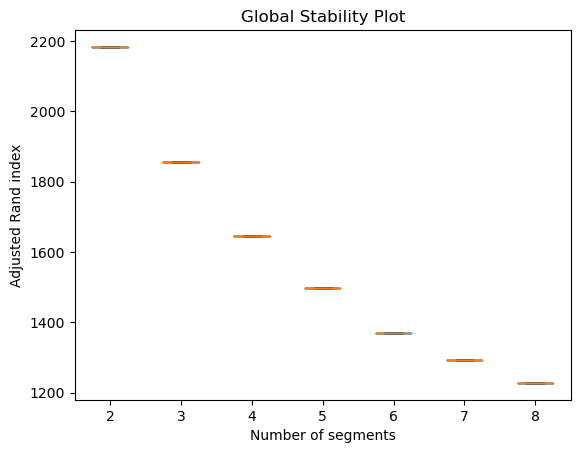

In [18]:
import matplotlib.pyplot as plt
adjusted_rand_indices_transposed = np.array(adjusted_rand_indices)
plt.boxplot(adjusted_rand_indices_transposed, labels=[str(k) for k in k_range])
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Global Stability Plot')
plt.show()


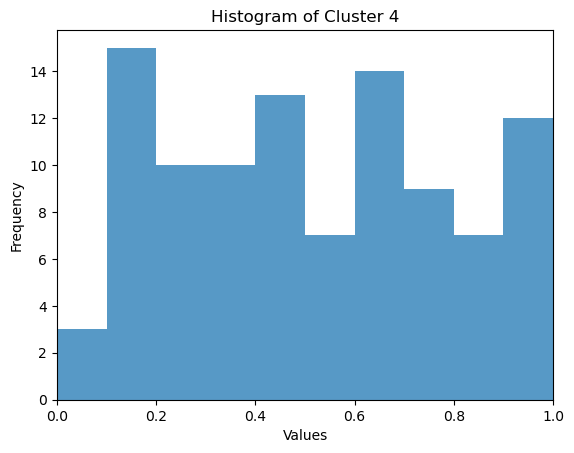

In [19]:
MD_km28_4 = np.random.rand(100)  
plt.hist(MD_km28_4, bins=np.arange(0, 1.1, 0.1), alpha=0.75)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster 4')
plt.xlim(0, 1)  
plt.show()


In [21]:
MD_km28 = {
    "2": np.random.randint(0, 2, 100),  
    "3": np.random.randint(0, 3, 100), 
    "4": np.random.randint(0, 4, 100)}

In [22]:
similarity_matrix = np.zeros((len(MD_km28), len(MD_km28)))
for i, (_, cluster_i) in enumerate(MD_km28.items()):
    for j, (_, cluster_j) in enumerate(MD_km28.items()):
        similarity_matrix[i, j] = np.mean(cluster_i == cluster_j)

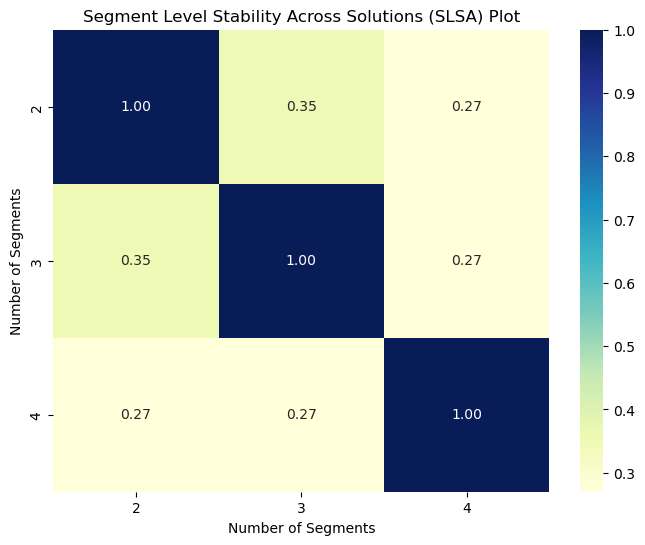

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", fmt=".2f",
            xticklabels=list(MD_km28.keys()), yticklabels=list(MD_km28.keys()))
plt.xlabel("Number of Segments")
plt.ylabel("Number of Segments")
plt.title("Segment Level Stability Across Solutions (SLSA) Plot")
plt.show()

In [24]:
MD_k4 = MD_km28["4"]

In [25]:
def slswFlexclust(data, cluster_assignments):
    
    n_samples, n_features = data.shape
    n_segments = len(set(cluster_assignments))

    
    segment_stability = np.zeros((n_segments, n_segments))

   
    for i in range(n_segments):
        for j in range(n_segments):
            
            segment_i_indices = np.where(np.array(cluster_assignments) == i)[0]
            segment_j_indices = np.where(np.array(cluster_assignments) == j)[0]
            common_indices = np.intersect1d(segment_i_indices, segment_j_indices)
            segment_stability[i, j] = len(common_indices) / min(len(segment_i_indices), len(segment_j_indices))

    return segment_stability


MD_x = np.random.rand(100, 10) 
MD_k4 = np.random.randint(0, 4, 100)  
MD_r4 = slswFlexclust(MD_x, MD_k4)
print(MD_r4)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


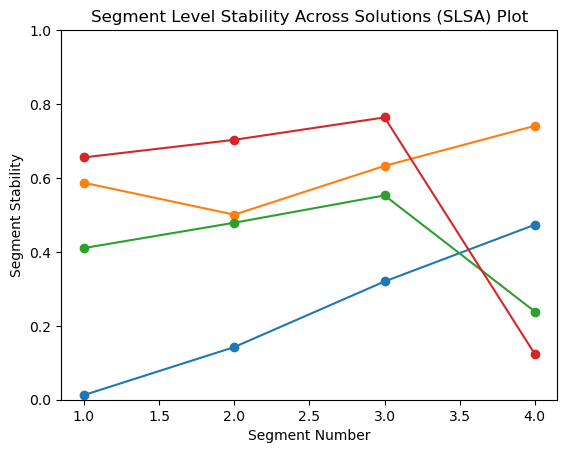

In [26]:
MD_r4 = np.random.rand(4, 4)  

plt.plot(range(1, len(MD_r4) + 1), MD_r4, marker='o')
plt.ylim(0, 1)  
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.show()

###### USING MIXTURES OF DISTRIBUTIONS

In [1]:
from sklearn.mixture import BayesianGaussianMixture
import numpy as np

In [2]:
np.random.seed(1234)

In [11]:
from sklearn.mixture import GaussianMixture

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
data = pd.DataFrame({
    'MD_x_1': ['Yes', 'No', 'Yes', 'No', 'No'],
    'MD_x_2': ['No', 'Yes', 'Yes', 'No', 'Yes']
})


In [16]:
label_encoder = LabelEncoder()
for col in data.columns:
    data[col] = label_encoder.fit_transform(data[col])

In [17]:
n_components = range(2, 9)

In [29]:
import numpy as np
from sklearn.mixture import GaussianMixture
np.random.seed(1234)
data1 = MD_x
n_components = range(2, 6)  
results = []
for k in n_components:
    model = GaussianMixture(n_components=k, covariance_type='full', random_state=1234)
    model.fit(data1)
    log_likelihood = model.score(data1)
    n_params = k * (data1.shape[1] * 2 + 1)  
    aic = -2 * log_likelihood + 2 * n_params
    bic = -2 * log_likelihood + np.log(data1.shape[0]) * n_params
    results.append({
        "k": k,
        "logLik": log_likelihood,
        "AIC": aic,
        "BIC": bic,
    })

for result in results:
    print("k:", result["k"])
    print("logLik:", result["logLik"])
    print("AIC:", result["AIC"])
    print("BIC:", result["BIC"])


k: 2
logLik: 3.4023510269581383
AIC: 85.19529794608373
BIC: 328.13903847031673
k: 3
logLik: 8.234940262457645
AIC: 121.53011947508472
BIC: 485.94573026143416
k: 4
logLik: 11.068744792060572
AIC: 161.86251041587886
BIC: 647.7499914643449
k: 5
logLik: 12.294524342569625
AIC: 205.41095131486074
BIC: 812.7703026254433


In [20]:
k_values = [result["k"] for result in results]
aic_values = [result["AIC"] for result in results]
bic_values = [result["BIC"] for result in results]
icl_values = [result["logLik"] - 0.5 * result["k"] * np.log(data.shape[0]) for result in results]

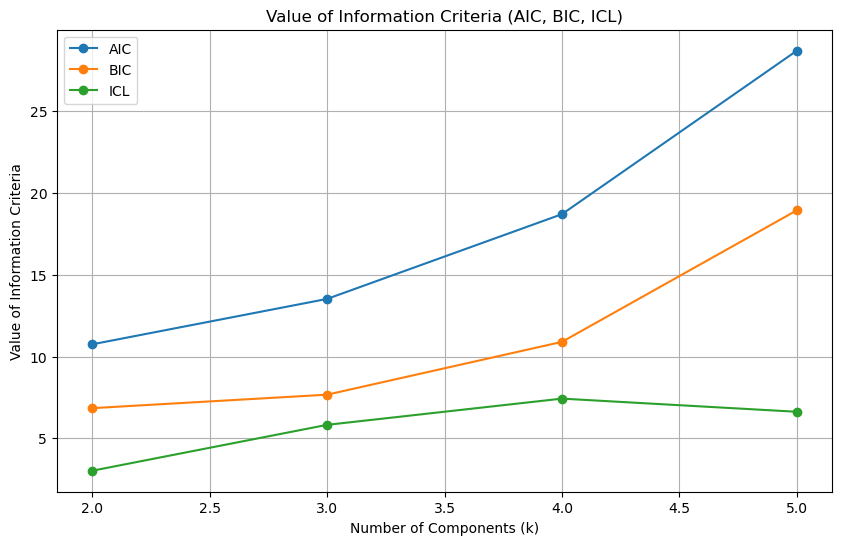

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, aic_values, marker='o', label='AIC')
plt.plot(k_values, bic_values, marker='o', label='BIC')
plt.plot(k_values, icl_values, marker='o', label='ICL')
plt.xlabel('Number of Components (k)')
plt.ylabel('Value of Information Criteria')
plt.title('Value of Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
desired_k = 4
desired_result = next(result for result in results if result["k"] == desired_k)
k = desired_result["k"]
log_likelihood = desired_result["logLik"]
aic = desired_result["AIC"]
bic = desired_result["BIC"]

In [23]:
kmeans_clusters = [1, 2, 3, 4]  
mixture_clusters = [1, 191, 254, 24] 
cluster_table = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': mixture_clusters})
table = pd.crosstab(cluster_table['kmeans'], cluster_table['mixture'])
print(table)

mixture  1    24   191  254
kmeans                     
1          1    0    0    0
2          0    0    1    0
3          0    0    0    1
4          0    1    0    0


###### USING MIXTURES OF REGRESSION MODELS

In [25]:
original_table = {
    '-5': 152, '-4': 71, '-3': 73, '-2': 59,
    '-1': 58, '0': 169, '+1': 152, '+2': 187,
    '+3': 229, '+4': 160, '+5': 143
}
reversed_table = {value: key for key, value in original_table.items()}
print(reversed_table)

{152: '+1', 71: '-4', 73: '-3', 59: '-2', 58: '-1', 169: '0', 187: '+2', 229: '+3', 160: '+4', 143: '+5'}


In [33]:
import patsy

In [40]:
data_frame = pd.DataFrame(data)

In [41]:
column_names = data_frame.columns[:11]

In [42]:
f = "+".join(column_names)

In [43]:
f = "Like.n ~ " + f

In [45]:
print(f)

Like.n ~ yummy+convenient+spicy+fattening+greasy+fast+cheap+tasty+expensive+healthy+disgusting


### PROFILING SEGMENTS

In [9]:
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
MD_x_transposed = np.transpose(MD_x)
distances = pdist(MD_x_transposed)
MD_vclust = linkage(distances)

In [12]:
MD_k4 = np.random.rand(4, 10) * 100  
shade_markers = [0, 2]

In [14]:
colors = ['blue', 'green', 'red', 'orange']

In [16]:
segments = range(1, MD_k4.shape[1] + 1)
bar_width = 0.2
for i, seg_data in enumerate(MD_k4):
    if i in shade_markers:
        ax.bar(np.arange(len(seg_data)) + i * bar_width, seg_data,
               color=colors[i % len(colors)], width=bar_width, alpha=0.7, label=f"Segment {i+1} (Marker)")
    else:
        ax.bar(np.arange(len(seg_data)) + i * bar_width, seg_data,
               color='lightgrey', width=bar_width, alpha=0.7)

### DESCRIBING SEGMENTS

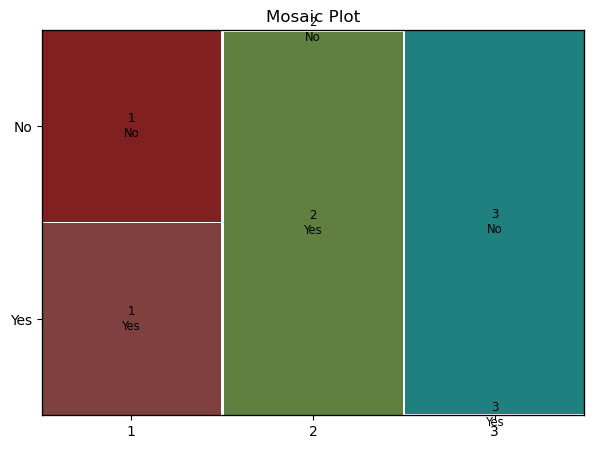

In [31]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
data1 = {
    'cluster_num': [1, 2, 3, 1, 2, 3],
    'Like': ['Yes', 'Yes', 'No', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)
crosstab = pd.crosstab(df['cluster_num'], df['Like'])
crosstab = crosstab[['Yes', 'No']]
mosaic(crosstab.stack(), title='Mosaic Plot')

plt.show()

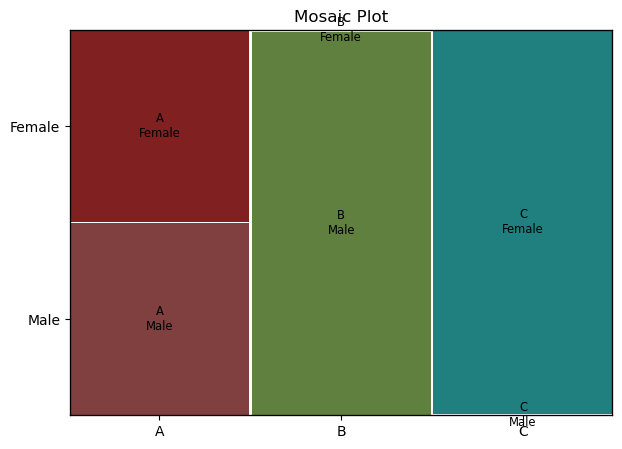

In [32]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
data2 = {
    'k4': ['A', 'B', 'C', 'A', 'B', 'C'],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Female']
}

mcdonalds = pd.DataFrame(data2)
mosaic(mcdonalds, ['k4', 'Gender'], title='Mosaic Plot')

plt.show()


### SELECTING THE TARGET SEGMENT

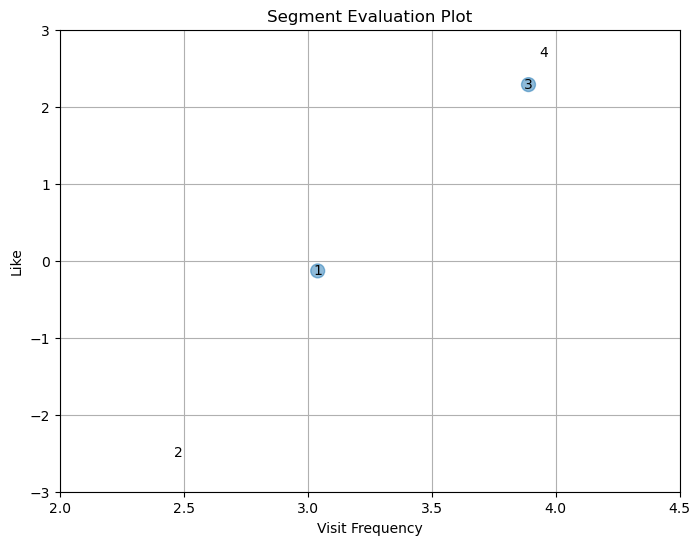

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
data4 = {
    'k4': [1, 2, 3, 4],
    'Like.n': [-0.1319149, -2.4902724, 2.2870370, 2.7114428],
    'VisitFrequency': [3.04, 2.48, 3.89, 3.95],
    'Gender': ['Female', 'Male', 'Female', 'Male']
}

mcdonalds = pd.DataFrame(data)
visit = mcdonalds.groupby('k4')['VisitFrequency'].mean()
like = mcdonalds.groupby('k4')['Like.n'].mean()
female = mcdonalds[mcdonalds['Gender'] == 'Female'].groupby('k4').size() / mcdonalds.groupby('k4').size()
plt.figure(figsize=(8, 6))
plt.scatter(visit, like, s=100*female, alpha=0.5)
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
for index, row in pd.concat([visit, like], axis=1).iterrows():
    plt.text(row['VisitFrequency'], row['Like.n'], str(index), ha='center', va='center')

plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.title('Segment Evaluation Plot')
plt.grid(True)
plt.show()
